# (title)

### Methods & Results

First we have to run all the libraries necessary to complete the data analysis

In [66]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


#### 1. Loading Data

In [67]:
player <- read_csv("player.csv")
player

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


#### 2. Wrangling and cleaning the data to the format necessary for the planned analysis

In [68]:
#Selecting the important variables
player_s <- player |>
    select(experience, played_hours, gender, age)

#removing the rows where some data is missing
player_cleaned <- na.omit(player_s)
player_cleaned

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
⋮,⋮,⋮,⋮
Amateur,0.0,Prefer not to say,17
Amateur,2.3,Male,17
Pro,0.2,Other,91


#### 3. Perform a summary of the data set that is relevant for exploratory data analysis related to planned analysis

In [69]:
summary_player <- player_cleaned |>
    summary()
summary_player

  experience         played_hours        gender               age       
 Length:196         Min.   :  0.000   Length:196         Min.   : 8.00  
 Class :character   1st Qu.:  0.000   Class :character   1st Qu.:17.00  
 Mode  :character   Median :  0.100   Mode  :character   Median :19.00  
                    Mean   :  5.846                      Mean   :21.28  
                    3rd Qu.:  0.600                      3rd Qu.:22.00  
                    Max.   :223.100                      Max.   :99.00  

#### 4. Creates a visualization of the data set that is relevant for exploratory data analysis related to the planned analysis

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


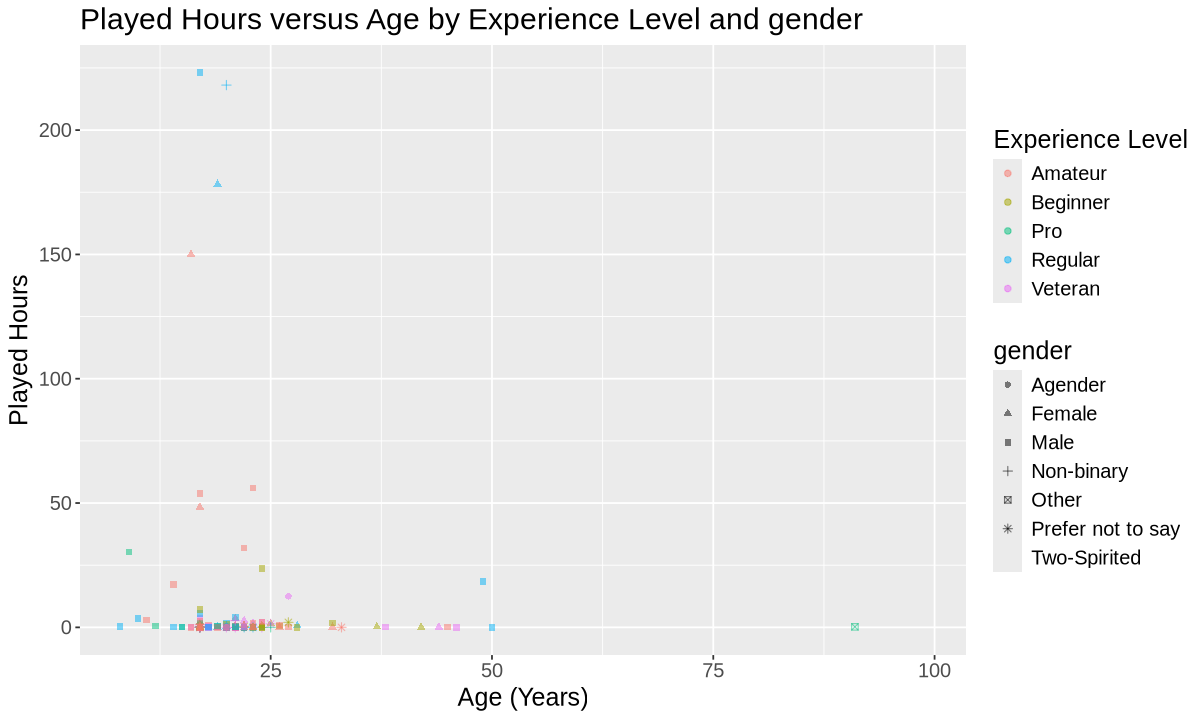

In [93]:
#setting the size of the plot
options(repr.plot.width = 10, repr.plot.height = 6)

#plot of played hours vs age by experience level and gender
scatter_plot <- player_cleaned|>
  ggplot(aes(x = age, y = played_hours, colour = experience, shape=gender)) + 
  geom_point(alpha = 0.5) +
  xlab('Age (Years)') +
  ylab('Played Hours') +
  labs(colour = "Experience Level") +
  ggtitle('Played Hours versus Age by Experience Level and gender') +
  theme(text = element_text(size = 15))

scatter_plot

Figure 1: This shows a scattered plot with the age of player as the x-axis, and number of hours played for each player as the y-axis. The legend shows the experience level of each player, for example, if the player is a pro at the game, the point would be colored green. If the player is a veteran, that point would be colored pink and so on. The second states gender, where each gender is marked by a specific shape, for example, for males, the shape it would have on the point would be a square.

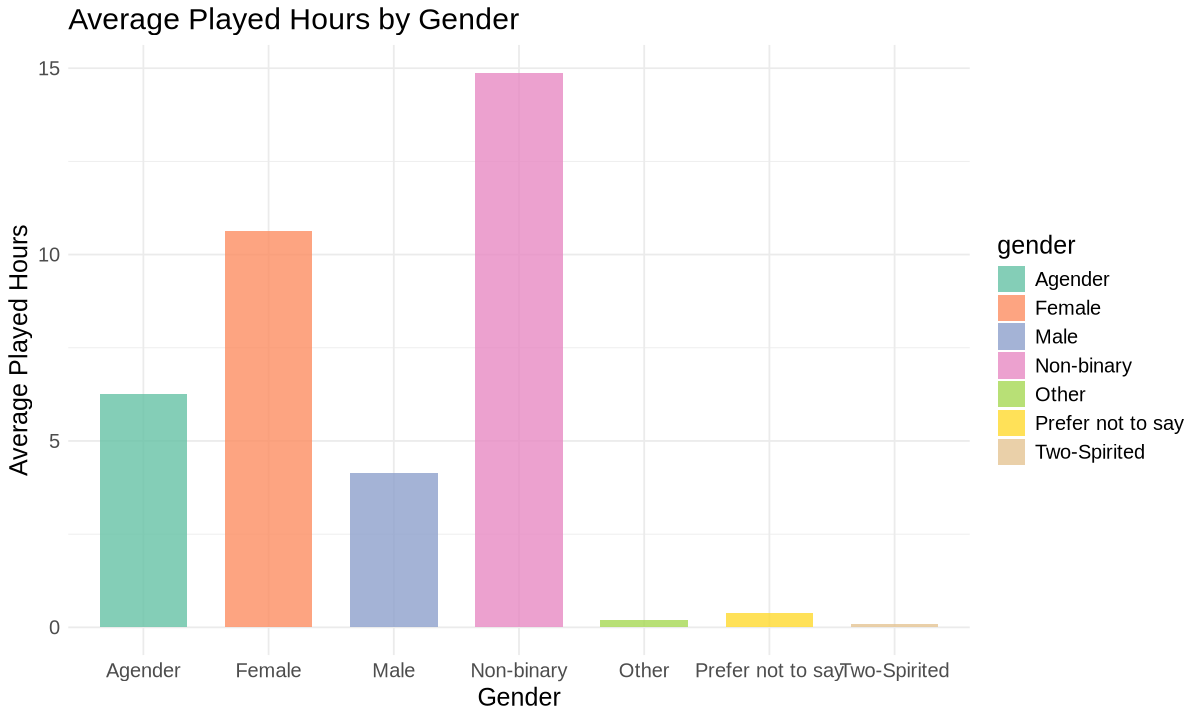

In [94]:
#finding the average played hours for each gender
average_played_hours <- player_cleaned |>
  group_by(gender) |>
  summarise(mean_played_hours = mean(played_hours))

#plot of average played hours by gender
gender_playtime_plot <- ggplot(average_played_hours, aes(x = gender, y = mean_played_hours, fill = gender)) +
  geom_bar(stat = "identity", width = 0.7, alpha = 0.8) +
  xlab("Gender") +
  ylab("Average Played Hours") +
  ggtitle("Average Played Hours by Gender") +
  theme_minimal() +
  theme(text = element_text(size = 15)) +
  scale_fill_brewer(palette = "Set2")

gender_playtime_plot

Figure 2: This shows a histogram with the gender of player as the x-axis and average number of hours played as the y-axis. The legend shows all the genders that have appeared in the data table. Looking at the plot, it clearly shows that non-binary gender players contribute to the most amount of play hours in the game.

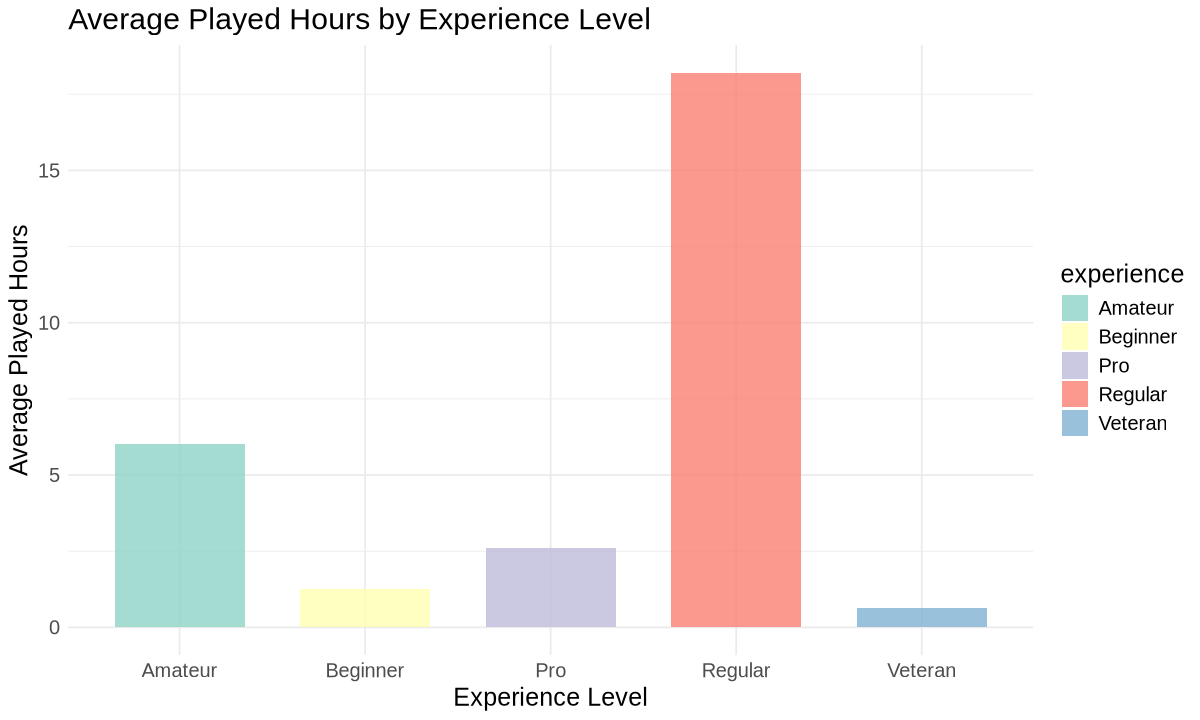

In [95]:
#finding the average playtime for all the experiences of each player
average_experience_playtime <- player_cleaned |>
  group_by(experience) |>
  summarise(mean_played_hours = mean(played_hours))

#plot of average played hours by experience level
experience_playtime_plot <- ggplot(average_experience_playtime, aes(x = experience, y = mean_played_hours, fill = experience)) +
  geom_bar(stat = "identity", width = 0.7, alpha = 0.8) +
  xlab("Experience Level") +
  ylab("Average Played Hours") +
  ggtitle("Average Played Hours by Experience Level") +
  theme_minimal() +
  theme(text = element_text(size = 15)) +
  scale_fill_brewer(palette = "Set3")

experience_playtime_plot

Figure 3: This is another histogram plot with experience level as the x-axis and average played hours for each experience level player as the y-axis. The legend shows all kind of experiences a player can have. Again, we can clearly see that players with regular experience in the game contributes to the most amount of play hours.

#### 5. Perform the data analysis

For the plot we want to perform data analysis on is the first plot, which is the scattered plot, we can use the method of linear regression to perform our data analysis

First, we want to split this data into training and testing datasets

In [96]:
#Splitting this into 75% as training and 25% as testing
player_split <- initial_split(player_cleaned, prop = 0.75, strata=played_hours)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_training
player_testing

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Regular,0.1,Male,21
Regular,0.0,Female,19
Amateur,0.0,Male,21
⋮,⋮,⋮,⋮
Amateur,0.8,Female,22
Amateur,32.0,Male,22
Amateur,2.3,Male,17


experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Veteran,0.0,Male,17
Amateur,0.7,Female,21
Amateur,0.0,Female,17
⋮,⋮,⋮,⋮
Amateur,0.4,Two-Spirited,17
Amateur,2.1,Male,24
Pro,1.7,Male,17


Now we want to build a linear regression model specification

In [97]:
player_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")
player_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


Creating the recipe and make a workflow analysis and fit our linear regression model

In [98]:
player_recipe <- recipe(played_hours ~ age, data = player_training)

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(player_training)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
    11.0330      -0.1779  


Visualizing the model predictions as a straight line, to see what the line looks like on the scattered plot.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


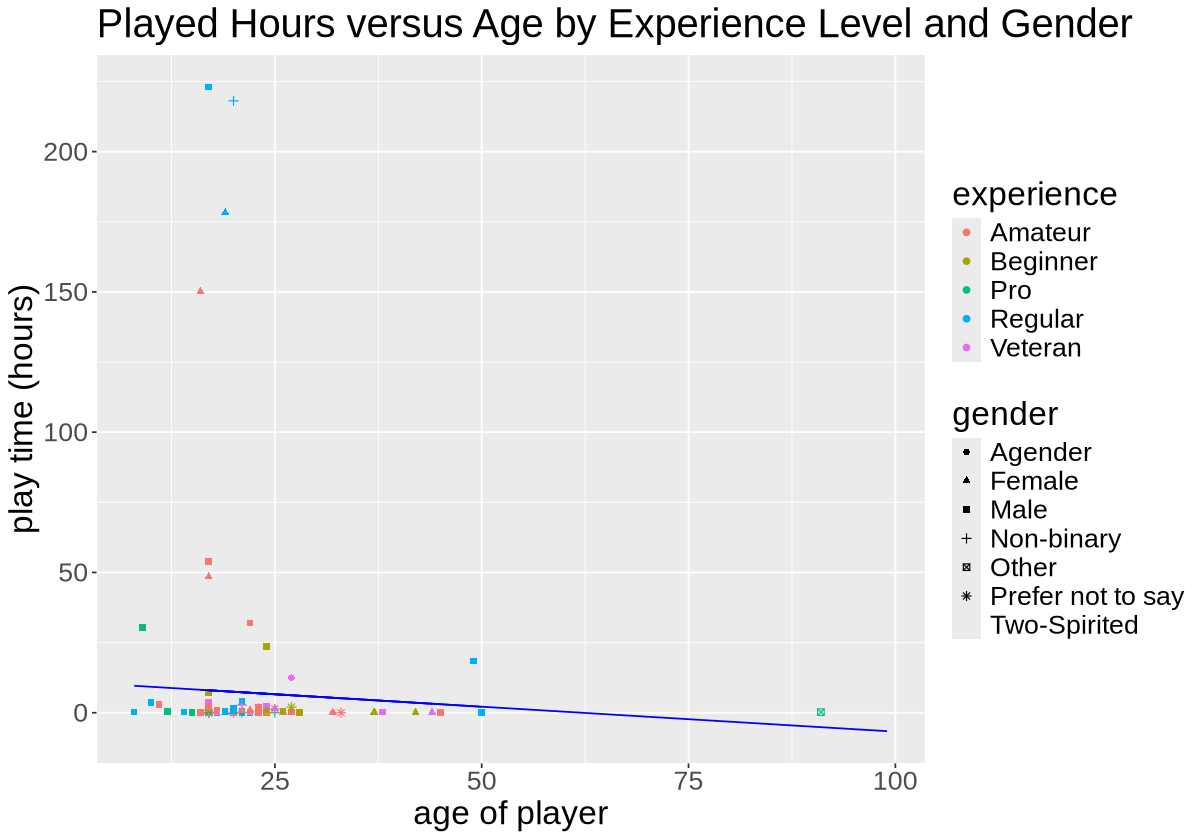

In [104]:
options(repr.plot.width = 10, repr.plot.height = 7)

player_preds <- player_fit |>
    predict(player_training) |>
    bind_cols(player_training)

player_predictions <- player_preds |>
    ggplot(aes(x= age, y=played_hours, color=experience, shape=gender)) +
    geom_point() +
    geom_line(mapping=aes(x=age, y=.pred), color="blue") +
    labs(x="age of player", y="play time (hours)",
         title="Played Hours versus Age by Experience Level and Gender") +
    theme(text = element_text(size = 20))

player_predictions

However, this is only for the training dataset, we need to do this again on our testing dataset.

We will have to make another recipe

In [105]:
player2_recipe <- recipe(played_hours ~ age, data = player_testing)

player2_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(player_testing)
player2_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
    1.16029      0.03782  


#### 6. Create a visualization of the analysis

Now, we can make visualization of the model predictions as a straight line for the testing dataset, to see what the line looks like on the scattered plot.

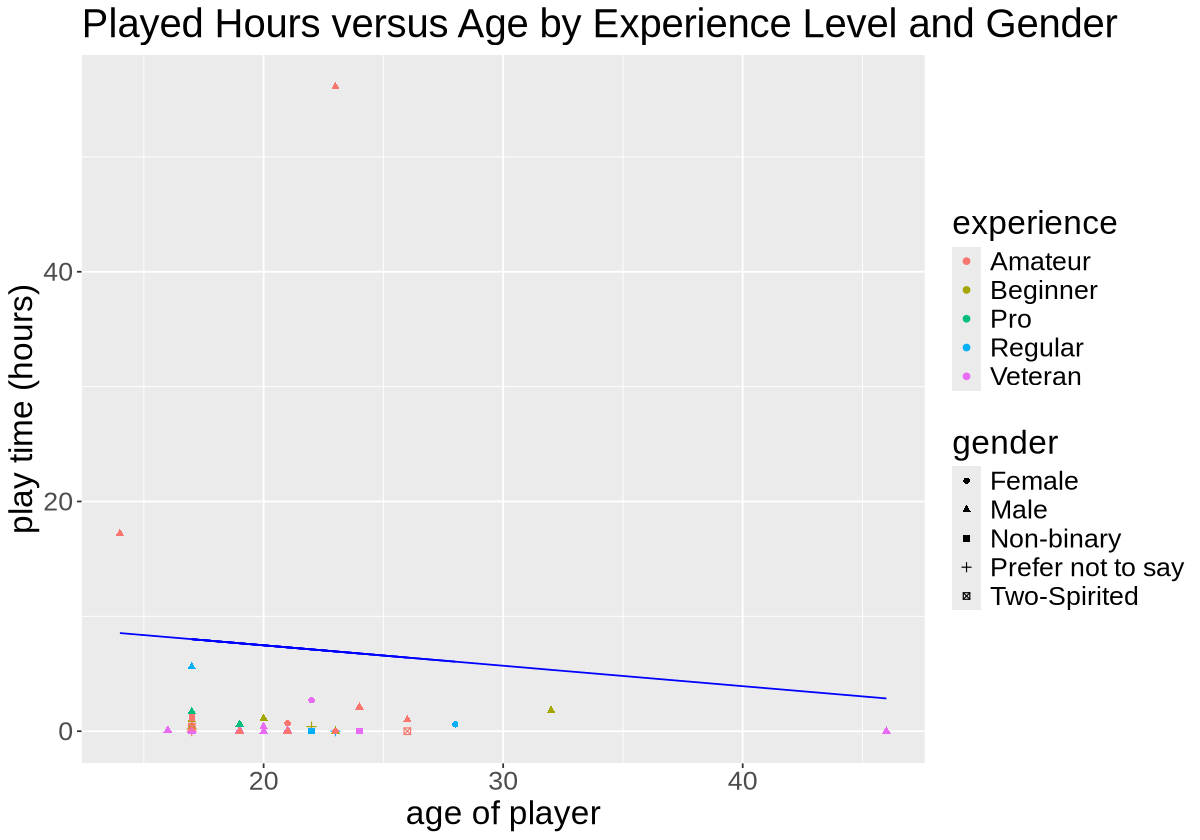

In [107]:
options(repr.plot.width = 10, repr.plot.height = 7)

player2_preds <- player_fit |>
    predict(player_testing) |>
    bind_cols(player_testing)

player_predictions <- player2_preds |>
    ggplot(aes(x= age, y=played_hours, color=experience, shape=gender)) +
    geom_point() +
    geom_line(mapping=aes(x=age, y=.pred), color="blue") +
    labs(x="age of player", y="play time (hours)",
         title="Played Hours versus Age by Experience Level and Gender") +
    theme(text = element_text(size = 20))

player_predictions

Figure 4: This is our final linear regression plot, the line shown can be described with the equation:

$Predicted \ played \ time \ (in \ hours) = 1.16 - 0.04 * age$

where 1.16 is the y intercept of the line on the plot and 0.04 is the slope of the line.